**Objectifs du TP :**


1.   découvrir l’apprentissage par perceptron multi-couches
2.   utiliser scikit-learn pour d«eterminer une architecture MLP performante pour un jeu de donn«ees



<h2> 1/ Introduction </h2>

**Le perceptron multicouche (multilayer perceptron MLP) est un type de réseau neuronal artificiel organisé en plusieurs couches au sein desquelles une information circule de la couche d'entrée vers la couche de sortie uniquement ; il s'agit donc d'un réseau à propagation directe (feedforward). Chaque couche est constituée d'un nombre variable de neurones, les neurones de la dernière couche (dite « de sortie ») étant les sorties du système global.**


*   La plate-forme sklearn, depuis sa version 0.18.1, fournit quelques fonctionnalit«es pour l’apprentis-
sage ‘a partir de perceptron multi-couches, en classification (classe MLPClassifier) et en r«egression
(classe MLPRegressor)
*   Dans le cas d’un «echantillon d’apprentissage S = {(s1, y 1), ÆÆÆ(sm, y m)}o‘u xi 2RN et yi 2{0, 1}
(classification binaire), un MLP a une couche cach«ee apprend la fonction f (x) = W2g(W T1 x+b1)+b2
o‘u W1 2Rn⇥k, W2 2Rk⇥1}, et b1 2Rk, b 2 2R, sont les param‘etres appris du mod‘ele (figure 1).
La fonction d’activation g(.) : R!Rest la fonction d’activation de la couche cach«ee, et la fonction
logistique est prise par d«efaut en sortie. Par d«efault, g est la tangente hyperbolique 



<h2> 1.2 / La classe MLPClassifier : mise en pratique </h2>

Ce mod‘ele optimise la fonction entropie crois«ee en utilisant le solveur LBFGS ou la descente de gradient stochastique.

***1.2.1) Prise en main du modéle***

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

1. Création du jeu de données (X et y) en utilisant les tableaux de numpy.

In [3]:
#1
X = np.array([ [0,0],[0,1]])
y = np.array([0,1])


2. Création un modéle MLP de classification avec une couche cachée de 4 neurones : l'apprentissage sur *S* Et le test sur [2.,2.], puis [-1.,-2.]

In [4]:
#2
clf = MLPClassifier(hidden_layer_sizes=(4,) , activation = 'logistic')
clf.fit(X,y)
# test
X_test = np.array([ [2.,2.],[-1.,-2.]])
print(f"{X_test} CLAssification : {clf.predict(X_test)}")

[[ 2.  2.]
 [-1. -2.]] CLAssification : [1 0]


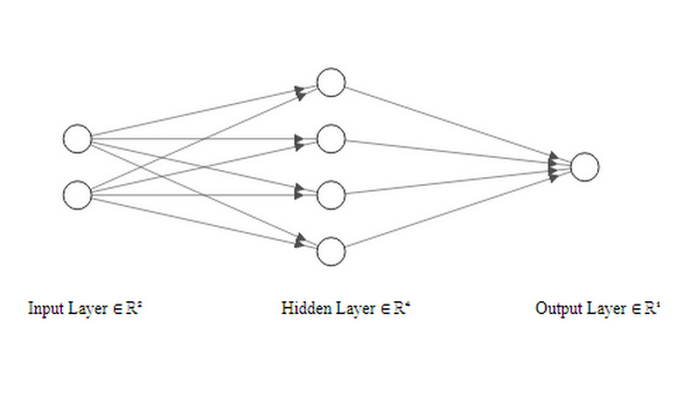

l'affichage  des coefficients appris,

In [5]:
# suite 2
clf.coefs_


[array([[ 0.37439946,  0.0022073 ,  0.3362749 ,  0.35129598],
        [-0.29177135,  0.52570404,  0.2862156 ,  0.23807874]]),
 array([[ 0.03632957],
        [ 0.4409345 ],
        [ 0.01667426],
        [-0.29899509]])]

In [6]:
clf.intercepts_

[array([ 0.34395379, -0.0067857 ,  0.4901069 , -0.48629783]),
 array([-0.13160071])]

3. on complete  S en ajoutant les exemples ([1, 1], 0) et ([1, 0], 1).
Apprenez les deux réseaux et affichage des
coefficients et biais obtenus ?

In [7]:
#3
X = np.array([ [0,0],[0,1],[1,1],[1,0] ])
y = np.array([0,1,0,1])
#
clf = MLPClassifier(hidden_layer_sizes=(4,) , activation = 'logistic')
clf.fit(X,y)
print(clf.predict(X))
print(clf.coefs_)
print(clf.intercepts_)

[1 1 1 1]
[array([[-0.14758764,  0.12534142,  0.28397452,  0.54901304],
       [-0.12275446,  0.27959045,  0.33663051,  0.0132638 ]]), array([[ 0.39384144],
       [ 0.45063881],
       [-0.14403549],
       [-0.14387901]])]
[array([-0.29866714,  0.33331135,  0.62628244,  0.50642117]), array([0.06658324])]


In [ ]:
#4


***1.2.2) Travail sur le jeu de données Iris***

1. Charger ce jeu de données. et les faites en train/test split 

In [3]:
#1 Chargement des données
iris = datasets.load_iris()
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

2. Apprendre cinq modéles de classification  Iris, avec des réseaux qui ont respectivement de 1 à 5 couches cachées et affichage du score

In [4]:
#2) 5 modèles de 1 à 5 couches cachées
def Modele_n_layer(N):
  start_time = time.time()
  clf = MLPClassifier(hidden_layer_sizes= N )
  clf.fit(X_train,y_train)
  end_time = time.time()
  print(f"Score :{clf.score(X_test,y_test) :.2f} Nombre de couches cachées : {clf.n_layers_ -2 } temps d'execution :{end_time - start_time :.2f}")

In [5]:
Modele_n_layer((100))
Modele_n_layer((100,150))
Modele_n_layer((100,50,200))
Modele_n_layer((100,150,200,80))
Modele_n_layer((50,150,200,50,80))

Score :0.95 Nombre de couches cachées : 1 temps d'execution :0.10
Score :0.96 Nombre de couches cachées : 2 temps d'execution :0.35
Score :0.96 Nombre de couches cachées : 3 temps d'execution :0.36
Score :0.95 Nombre de couches cachées : 4 temps d'execution :0.46
Score :0.92 Nombre de couches cachées : 5 temps d'execution :0.38


3. Comparer les résultats avec une classifieur à noyau de type SVM 
avec noyaux polynomial : clsvm = svm.SVC(kernel=’poly’).

In [7]:
# 3 
start_time = time.time()
clsvm = SVC(kernel='poly')
clsvm.fit(X_train,y_train)
end_time = time.time()
print(f"Score :{clsvm.score(X_test,y_test) :.2f}  temps d'execution :{end_time - start_time :.3f}")


Score :0.96  temps d'execution :0.002


 **-----> on constate que le classifier SVM est plus rapide que le MLP 
classifier et son score est meilleur que le MLP**

   1 . Normaliser les données

In [8]:
# # 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

2. Réapprendre et tester les cinq modèles MLP et le SVM après avoir 
normalisé les données en entrées

In [12]:
## 2
Modele_n_layer((100))
Modele_n_layer((100,150))
Modele_n_layer((100,50,200))
Modele_n_layer((100,150,200,80))
Modele_n_layer((50,150,200,50,80))

Score :0.95 Nombre de couches cachées : 1 temps d'execution :0.11
Score :0.91 Nombre de couches cachées : 2 temps d'execution :0.36
Score :0.91 Nombre de couches cachées : 3 temps d'execution :0.26
Score :0.89 Nombre de couches cachées : 4 temps d'execution :0.28
Score :0.92 Nombre de couches cachées : 5 temps d'execution :0.26


In [14]:
# svm
start_time = time.time()
clsvm = SVC(kernel='poly')
clsvm.fit(X_train,y_train)
end_time = time.time()
print("Svm AVEC Scalestander")
print(f"Score :{clsvm.score(X_test,y_test):.2f}  temps d'execution :{end_time - start_time :.3f}")

Svm AVEC Scalestander
Score :0.92  temps d'execution :0.002


***On constate une amélioration sur les score de MLP classfier Tandis que le score SVM à diminué avec les données normalisées***

1. Pour chacun des cinq modèles précédemment appris après 
normalisation, et pour chaque solveur disponible, indiquez : le 
temps de convergence, le nombre d’itérations pour converger, 
et les performances du modèle appris. Résumez ces informations 
au sein d’un tableau récapitulatif.

In [16]:
### 1
def Modele_n_layer_solveur(N):
  solveur = ['lbfgs','sgd','adam']
  for i in solveur :
    start_time = time.time()
    clf = MLPClassifier(solver = i ,hidden_layer_sizes= N , max_iter = 800 )
    clf.fit(X_train,y_train)
    end_time = time.time()
    run_time = end_time - start_time
    score = clf.score(X_test,y_test)
    print(f"couches cachées : {clf.n_layers_ -2} || Solveur :{i} || run time  :{run_time:.2f} \
    || || nombres d'itérations :{clf.n_iter_} || Score :{score:.2f}  ")

In [17]:
Modele_n_layer_solveur((100))
Modele_n_layer_solveur((100,150))
Modele_n_layer_solveur((100,50,200))
Modele_n_layer_solveur((100,150,200,80))
Modele_n_layer_solveur((50,150,200,50,80))

couches cachées : 1 || Solveur :lbfgs || run time  :0.02     || || nombres d'itérations :13 || Score :0.88  
couches cachées : 1 || Solveur :sgd || run time  :0.41     || || nombres d'itérations :800 || Score :0.89  
couches cachées : 1 || Solveur :adam || run time  :0.25     || || nombres d'itérations :464 || Score :0.91  
couches cachées : 2 || Solveur :lbfgs || run time  :0.07     || || nombres d'itérations :14 || Score :0.88  
couches cachées : 2 || Solveur :sgd || run time  :1.23     || || nombres d'itérations :800 || Score :0.91  
couches cachées : 2 || Solveur :adam || run time  :0.33     || || nombres d'itérations :188 || Score :0.89  
couches cachées : 3 || Solveur :lbfgs || run time  :0.15     || || nombres d'itérations :16 || Score :0.89  
couches cachées : 3 || Solveur :sgd || run time  :1.47     || || nombres d'itérations :800 || Score :0.93  
couches cachées : 3 || Solveur :adam || run time  :0.26     || || nombres d'itérations :130 || Score :0.91  
couches cachées : 4 ||

2. le modéle qui propose de meilleurs résultats est : le modéle avec 4 couches cachées et comme Solveur SGD

In [18]:
### battre le score SVM avec le changemnt d'Alpha
for l in [0.0 ,0.00001,0.0001, 0.005, 0.001, 0.01 , 0.1, 1 , 10]:
  clf_alpha = MLPClassifier(solver = "sgd" ,hidden_layer_sizes= (100,150,200,80) , max_iter = 800 , alpha=l)
  clf_alpha.fit(X_train,y_train)
  score = clf_alpha.score(X_test,y_test)
  print(f"valeur Alpha : {l} || Score :{score:.2f}  ")

valeur Alpha : 0.0 || Score :0.91  
valeur Alpha : 1e-05 || Score :0.92  
valeur Alpha : 0.0001 || Score :0.93  
valeur Alpha : 0.005 || Score :0.93  
valeur Alpha : 0.001 || Score :0.95  
valeur Alpha : 0.01 || Score :0.96  
valeur Alpha : 0.1 || Score :0.96  
valeur Alpha : 1 || Score :0.95  
valeur Alpha : 10 || Score :0.64  


<h2> Travail sur le jeu de données MNIST </h2>

MNIST a été développé par les précurseurs du deep learning, Y. 
LeCun et Y. Bengio, en 1998. Il contient des données d’écriture 
manuelle des chiffres de 0 à 9. Il mène généralement à un 
problème de classification multi-classes à 10 classes. Dans sa 
forme initiale, l’échantillon d’apprentissage comporte 
60000 exemples, et 10000 en test.

*En faisant varier les differentes hyper-paramétres du modéle, avec ou sans pre-processing, et enutilisant une GridSearch, parvenez-vous à battre les quelques*

In [19]:
# importer et explorer notre data
from sklearn.datasets import fetch_openml
mns = fetch_openml("mnist_784")

In [20]:
# explorer notre data
X, y = mns.data , mns.target
print(f"dim de données : {X.shape} || target : {y.shape}")

dim de données : (70000, 784) || target : (70000,)


In [21]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# On conserve 1000 (0.14%) du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14285)
print(f"taille de training {len(X_train)} | taille de test {len(X_test)}")

taille de training 60000 | taille de test 10000


In [25]:
# entrainement avec un classifieur MLPClass
start_time = time.time()
clf = MLPClassifier(hidden_layer_sizes=(150,) , activation = 'relu')
clf.fit(X_train,y_train)
end_time = time.time()
print(f"Score : {clf.score(X_test,y_test)} || temps dexec : {end_time -  start_time}")

Score : 0.9694 || temps dexec : 244.39258432388306


In [26]:
def preprocessing(X_train,X_test):
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

In [ ]:
mlp_mns = MLPClassifier()
parameters_mns = {
    'hidden_layer_sizes': [(200)],
    'activation': ["logistic","relu"],
    'solver': ["lbfgs","sgd","adam"],
    'alpha': [0.0001, 0.001, 0.01]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_mns, parameters_mns )
clf.fit(X_train, y_train) 